# Explore and Plot the ATL08 data
Plot the ATL08 terrain and canopy data for various ArcticDEM strips

In [1]:
%matplotlib inline

In [2]:
import os

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (15, 8), 'font.size': 10})

# from shapely.geometry import Polygon, Point
import hvplot
import hvplot.pandas
import geoviews as gv

In [3]:
'''
V:\icesat2\rema\region_01_subantarctic_islands
W:\icesat2\rema\region_19_victoria_land\WV02_20181125_1030010087975700_1030010088694700_2m_lsf
W:\icesat2\rema\region_21_mbl_north\WV03_20181221_1040010045249300_1040010047586D00_2m_lsf
W:/icesat2/rema/region_24_ctam/W1W1_20190213_102001008107AD00_1020010081B45300_2m_lsf
D:\icesat2\rema\region_03_peninsula_south\W3W3_20190415_104001004A5F0500_104001004BC25200_2m_lsf

D:\icesat2\EarthDEM\region_31_alaska_south-x\WV03_20190705_104001004E70E200_104001004D3F5400_2m_lsf
'''

region = 'region_31_alaska_south'#'region_34_alaska_north'#'region_31_alaska_south'#'region_19_victoria_land' #'region_03_peninsula_south'
# folder = f'W:/icesat2/rema/{region}'
# folder = f'D:/icesat2/EarthDEM/{region}'
folder = f'/fs/byo/howat-data5/icesat2/EarthDEM/{region}'
strips = os.listdir(folder)
len(strips)

951

fig_folder = '/home/yadav.111/figs_icesat'
fig_folder

In [4]:
# For region 31: strip indices: -31, 301, 402
# interesting: 880
strip = strips[0]

In [5]:
# strip = 'W1W1_20190208_10200100827B7600_1020010082EBD500_2m_lsf'#'W2W3_20190313_103001008F927000_104001004BC46B00_2m_lsf'
# icesat2_path = f'{folder}/{strip}'
# icesat2_path = 'test_data'
# os.listdir(icesat2_path)
# outline = gpd.read_file('D:/wspace/icesat2/urmia/outline.shp')
# outline = gpd.read_file('D:/wspace/icesat2/tanana/outline.shp')
# icesat2_path = 'D:/wspace/icesat2/alaska3a'
# icesat2_path = f'/fs/project/howat.4/icesat2/greenland_ATL06'
icesat2_path = f'/fs/project/howat.4/icesat2/prototyping/x_mcmurdo_ATL08'
# icesat2_path = f'D:/icesat2/test_ATL08_a'

files = os.listdir(f'{icesat2_path}')

In [6]:
files

['processed_ATL08_20190902095606_10130403_003_01.h5',
 'processed_ATL08_20191001083212_00680503_003_01.h5',
 'processed_ATL08_20190927084032_00070503_003_01.h5',
 'processed_ATL08_20190903221520_10360405_003_01.h5',
 'processed_ATL08_20190907220700_10970405_003_01.h5',
 'processed_ATL08_20190906094746_10740403_003_01.h5',
 'processed_ATL08_20190902095606_10130403_003_01.csv',
 'processed_ATL08_20190902095606_10130403_003_01.gpkg',
 'processed_ATL08_20191001083212_00680503_003_01.csv',
 'processed_ATL08_20191001083212_00680503_003_01.gpkg',
 'processed_ATL08_20190927084032_00070503_003_01.csv',
 'processed_ATL08_20190927084032_00070503_003_01.gpkg',
 'processed_ATL08_20190903221520_10360405_003_01.csv',
 'processed_ATL08_20190903221520_10360405_003_01.gpkg',
 'processed_ATL08_20190907220700_10970405_003_01.csv',
 'processed_ATL08_20190907220700_10970405_003_01.gpkg',
 'processed_ATL08_20190906094746_10740403_003_01.csv',
 'processed_ATL08_20190906094746_10740403_003_01.gpkg']

In [7]:
# outline = gpd.read_file(f'{icesat2_path}/strip_outline.shp')
# outline.plot(column='seg_id', alpha=.5), plt.title(f'{strip}');

hdf_files = [f for f in files if f.endswith('.h5') and 'ATL08' in f]
shp_files = [f for f in files if f.endswith('.gpkg') and 'ATL08' in f]
csv_files = [f for f in files if f.endswith('.csv') and 'ATL08' in f]
# To pick the largest granule for visualization only
sz_list = [os.path.getsize(f'{icesat2_path}/{hdf}') for hdf in hdf_files]
idx = sz_list.index(max(sz_list)) #largest index
print('No. of shp files',len(shp_files), len(hdf_files))
# print(outline.area)

# idx = 2 #overwrite the file index 
fname = shp_files[idx].split('.gpkg')[0]

# Load ATL08 parsed data
df = pd.read_csv(f'{icesat2_path}/{fname}.csv', parse_dates=True)
gdf = gpd.read_file(f'{icesat2_path}/{fname}.gpkg', parse_dates=True)
# Pick only the good quality data [verify if zero or one means good]
# df = df[df.q_flag==0]
# gdf = gdf[gdf.q_flag==0]

gtls = list(df.strip.unique())
print(len(df), gtls)
# gv.tile_sources.ESRI * gdf.hvplot.points(geo=True, color='strip', alpha=0.7, width=500, height=700, hover=['strip', 'h_te_media'])

No. of shp files 6 6
1599 ['gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r']


In [8]:
# df['subset_can_flag'] seems new flag in version 3

In [9]:
gtl = gtls[0]
base = gv.tile_sources.ESRI
gtracks = gdf.hvplot.points(geo=True, color='strip', alpha=0.7, width=500, height=700, hover=['strip', 'h_te_media'])
terrain_scatter = df[df.strip==gtl].hvplot(y='lat', x='h_te_min', kind='scatter', width=350, height=650, color='brown', s=20, alpha=.9).relabel('terrain') # by='strip', 
canopy_scatter = df[df.strip==gtl].hvplot(y='lat', x='h_max_canopy_abs', kind='scatter', width=350, height=650, color='green', s=10, alpha=.9, title=f'Elevation ({gtl})', xlabel='meters').relabel('canopy')
fig1 = (base*gtracks + terrain_scatter*canopy_scatter).cols(2)
# fig1 = base*gtracks + terrain_scatter*canopy_scatter
# hvplot.save(fig1, f'{fig_folder}/{fname}.png')
fig1

:Layout
   .Overlay.I  :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [Longitude,Latitude]   (strip)
   .Overlay.II :Overlay
      .Scatter.Terrain :Scatter   [h_te_min]   (lat)
      .Scatter.Canopy  :Scatter   [h_max_canopy_abs]   (lat)

In [10]:
gdf.head()

lon        lat                 t_dt  layer_flag  h_te_best_fit  \
0 -149.626907  61.030762  2019-09-27T08:41:33           1     908.848145   
1 -149.627106  61.031654  2019-09-27T08:41:33           1     913.961243   
2 -149.627304  61.032547  2019-09-27T08:41:33           1     897.600952   
3 -149.627502  61.033440  2019-09-27T08:41:33           1     866.604065   
4 -149.627701  61.034332  2019-09-27T08:41:33           1     853.795288   

   h_te_interp    h_te_max   h_te_mean  h_te_median    h_te_min  ...  \
0   908.863770  919.980591  909.524475   908.932922  908.492493  ...   
1   913.871582  915.138733  913.378784   913.964233  909.636047  ...   
2   896.912781  910.085815  897.456848   899.679688  879.784546  ...   
3   866.292908  880.323303  867.068726   866.088867  858.007080  ...   
4   853.568787  857.992004  853.883789   853.748474  850.667908  ...   

   h_median_canopy_abs  h_min_canopy  h_min_canopy_abs  landsat_flag  \
0           913.415833      0.546021        909.651428             0   
1           914.295898      0.500305        911.200439             0   
2           902.673584      0.662842        881.477051             0   
3           870.605652      0.518433        859.210754             0   
4                  NaN           NaN               NaN             0   

   landsat_perc  n_ca_photons  n_toc_photons  toc_roughness  strip  \
0           6.2            43             20       0.912467   gt1l   
1           6.8            67              3       0.315809   gt1l   
2          14.8            78             21       0.686438   gt1l   
3           9.4            71              5       0.484495   gt1l   
4           4.4            17              0            NaN   gt1l   

                      geometry  
0  POINT (-149.62691 61.03076)  
1  POINT (-149.62711 61.03165)  
2  POINT (-149.62730 61.03255)  
3  POINT (-149.62750 61.03344)  
4  POINT (-149.62770 61.03433)  

[5 rows x 40 columns]

In [11]:
# Detour: To save above figure
# hvplot.save(fig1, f'{fig_folder}/{fname}.png')


In [12]:
# df[df.strip==gtl].hvplot.area(x='lat', y=['h_te_min', 'h_max_canopy_abs'], alpha=.5)


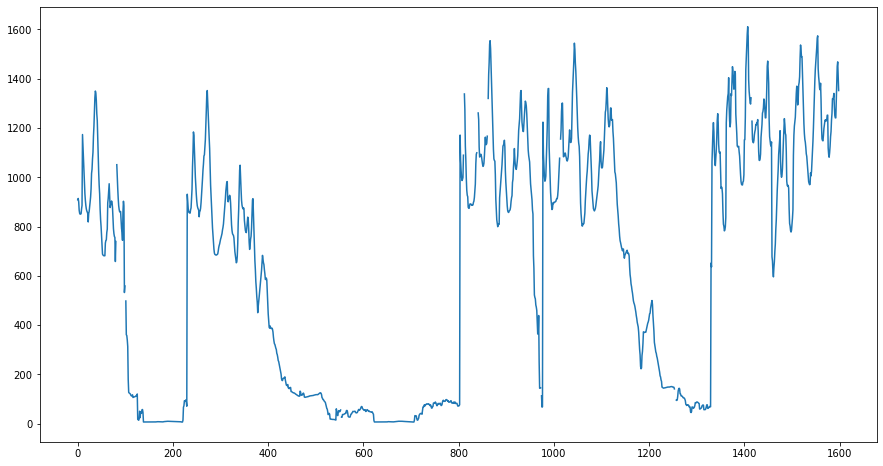

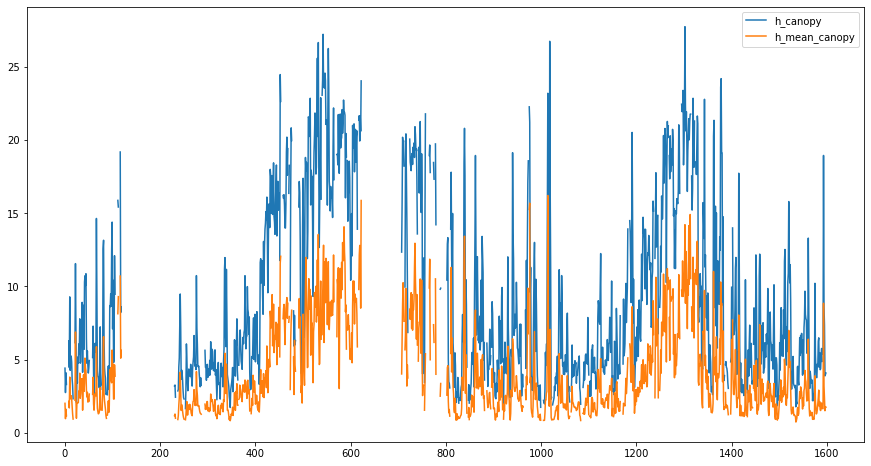

In [13]:
gdf.h_te_median.plot()
gdf[['h_canopy', 'h_mean_canopy']].plot(); #error in plotting if no numeric data; ie for areas with no vegetation

In [14]:
gdf.columns

Index(['lon', 'lat', 't_dt', 'layer_flag', 'h_te_best_fit', 'h_te_interp',
       'h_te_max', 'h_te_mean', 'h_te_median', 'h_te_min', 'h_te_mode',
       'h_te_skew', 'h_te_std', 'h_te_uncertainty', 'n_te_photons',
       'terrain_slope', 'canopy_flag', 'canopy_openness', 'canopy_rh_conf',
       'centroid_height', 'h_canopy', 'h_canopy_abs', 'h_canopy_quad',
       'h_canopy_uncertainty', 'h_dif_canopy', 'h_max_canopy',
       'h_max_canopy_abs', 'h_mean_canopy', 'h_mean_canopy_abs',
       'h_median_canopy', 'h_median_canopy_abs', 'h_min_canopy',
       'h_min_canopy_abs', 'landsat_flag', 'landsat_perc', 'n_ca_photons',
       'n_toc_photons', 'toc_roughness', 'strip', 'geometry'],
      dtype='object')

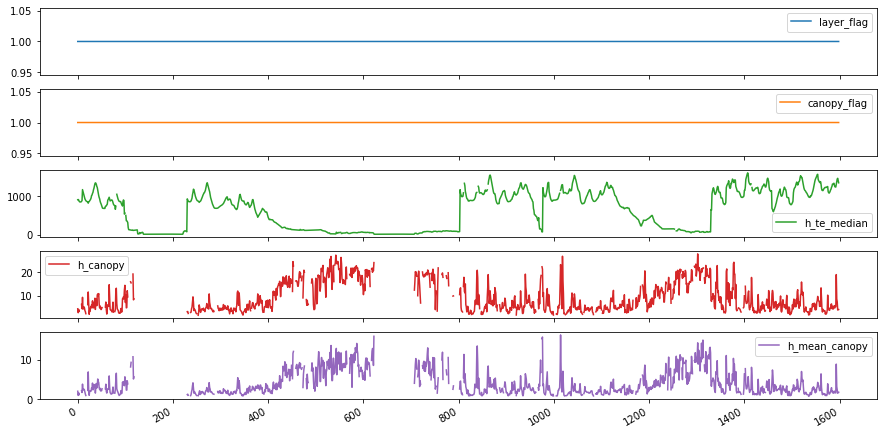

In [15]:
gdf[['layer_flag','canopy_flag', 'h_te_median', 'h_canopy', 'h_mean_canopy']].plot(subplots=True); #layer flag = 1; blowing snow likely; but perhaps its the otherway round!!

In [16]:
gdf.columns

Index(['lon', 'lat', 't_dt', 'layer_flag', 'h_te_best_fit', 'h_te_interp',
       'h_te_max', 'h_te_mean', 'h_te_median', 'h_te_min', 'h_te_mode',
       'h_te_skew', 'h_te_std', 'h_te_uncertainty', 'n_te_photons',
       'terrain_slope', 'canopy_flag', 'canopy_openness', 'canopy_rh_conf',
       'centroid_height', 'h_canopy', 'h_canopy_abs', 'h_canopy_quad',
       'h_canopy_uncertainty', 'h_dif_canopy', 'h_max_canopy',
       'h_max_canopy_abs', 'h_mean_canopy', 'h_mean_canopy_abs',
       'h_median_canopy', 'h_median_canopy_abs', 'h_min_canopy',
       'h_min_canopy_abs', 'landsat_flag', 'landsat_perc', 'n_ca_photons',
       'n_toc_photons', 'toc_roughness', 'strip', 'geometry'],
      dtype='object')

In [17]:
gv.tile_sources.ESRI * gdf.hvplot(geo=True, color='h_te_median', width=500, height=500, alpha=.5, cmap='rainbow')

/home/yadav.111/miniconda3/lib/python3.7/site-packages/holoviews/plotting/util.py:685: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  [cmap for cmap in cm.cmap_d if not
/home/yadav.111/miniconda3/lib/python3.7/site-packages/holoviews/plotting/util.py:685: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  [cmap for cmap in cm.cmap_d if not


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (h_te_median)

In [18]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

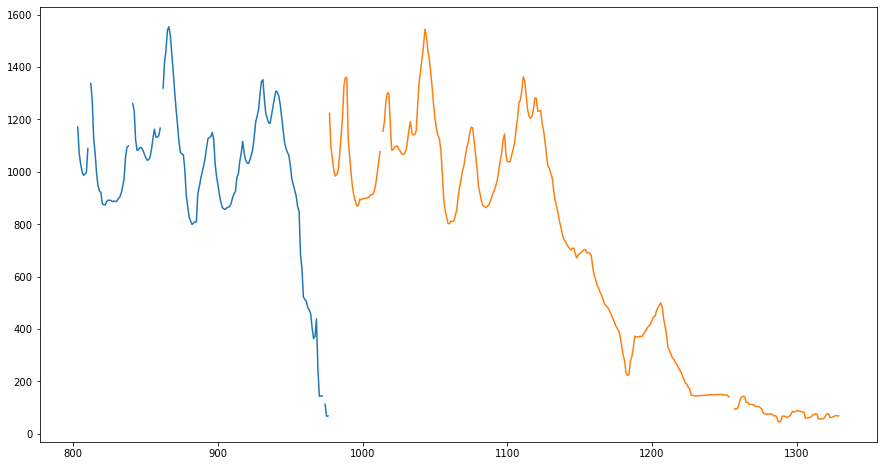

In [19]:
gdf[gdf.strip=='gt2l'].h_te_median.plot()
gdf[gdf.strip=='gt2r'].h_te_median.plot();

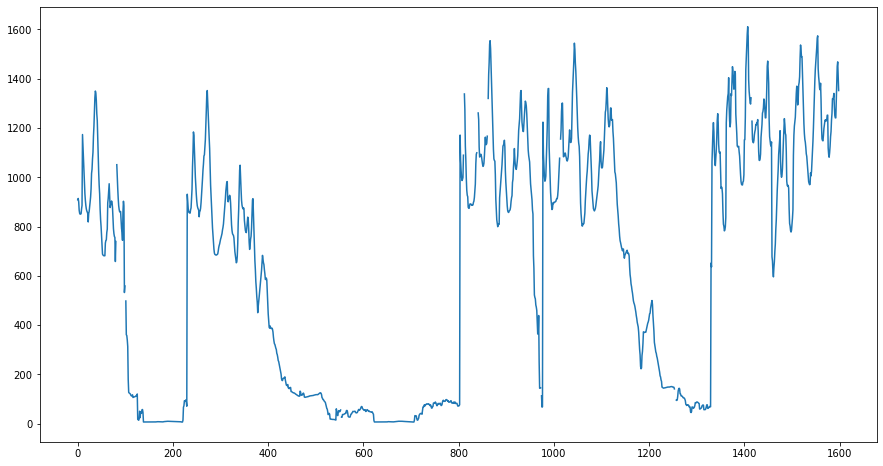

In [20]:
gdf.h_te_median.plot();

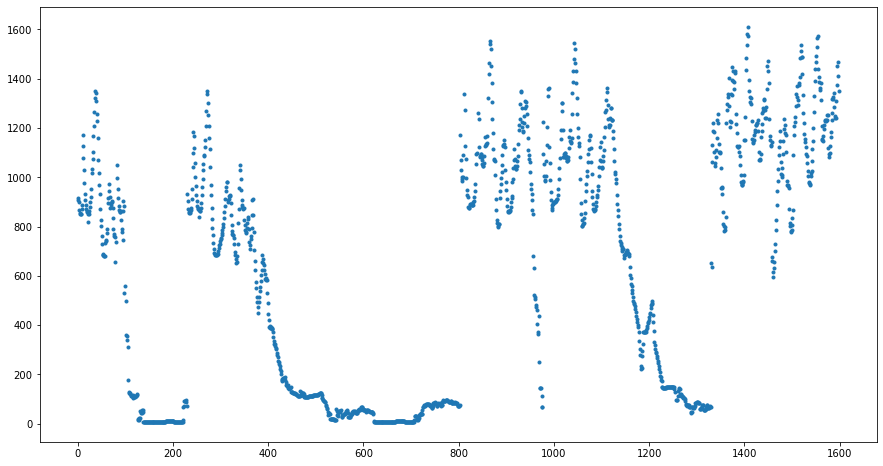

In [21]:
gdf[gdf.layer_flag==1].h_te_median.plot(style='.');
gdf[gdf.layer_flag==0].h_te_median.plot(style='o', alpha=.6);

In [22]:
# gdf['lat'] = gdf.geometry.apply(lambda x:x.y)
# np.isnan(df.h_canopy).sum(), len(df)

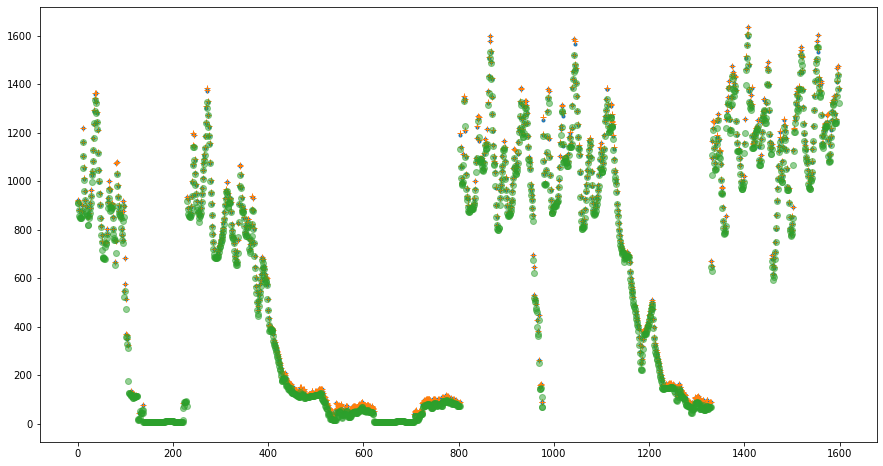

In [23]:
# Error in Canopy-free granules (TypeError: no numeric data to plot)
df.h_canopy_abs.plot(style='.')
df.h_max_canopy_abs.plot(style='+')
df.h_te_min.plot(style='o', alpha=.5);

In [24]:
dfx = gdf.drop(['geometry'], axis=1)
dfx = pd.DataFrame(dfx)
dfx['t_dt'] = pd.to_datetime(dfx.t_dt)
type(dfx)

pandas.core.frame.DataFrame

In [25]:
df['t_dt'] = pd.to_datetime(df.t_dt)


In [26]:
df.head()

lon        lat                    t_dt  layer_flag  h_te_best_fit  \
0 -149.6269  61.030760 2019-09-27 08:41:33.405           1      908.84814   
1 -149.6271  61.031654 2019-09-27 08:41:33.419           1      913.96124   
2 -149.6273  61.032547 2019-09-27 08:41:33.433           1      897.60095   
3 -149.6275  61.033440 2019-09-27 08:41:33.447           1      866.60406   
4 -149.6277  61.034332 2019-09-27 08:41:33.461           1      853.79530   

   h_te_interp   h_te_max  h_te_mean  h_te_median   h_te_min  ...  \
0     908.8638  919.98060  909.52450    908.93290  908.49250  ...   
1     913.8716  915.13873  913.37880    913.96423  909.63605  ...   
2     896.9128  910.08580  897.45685    899.67970  879.78455  ...   
3     866.2929  880.32330  867.06870    866.08887  858.00710  ...   
4     853.5688  857.99200  853.88380    853.74850  850.66790  ...   

   h_median_canopy  h_median_canopy_abs  h_min_canopy  h_min_canopy_abs  \
0         1.817505            913.41583      0.546021         909.65140   
1         0.776794            914.29590      0.500305         911.20044   
2         1.490356            902.67360      0.662842         881.47705   
3         1.025574            870.60565      0.518433         859.21075   
4              NaN                  NaN           NaN               NaN   

   landsat_flag  landsat_perc  n_ca_photons  n_toc_photons  toc_roughness  \
0             0           6.2            43             20       0.912467   
1             0           6.8            67              3       0.315809   
2             0          14.8            78             21       0.686438   
3             0           9.4            71              5       0.484495   
4             0           4.4            17              0            NaN   

   strip  
0   gt1l  
1   gt1l  
2   gt1l  
3   gt1l  
4   gt1l  

[5 rows x 39 columns]

In [27]:
df.hvplot(y='h_te_mean', x='t_dt', by='strip', kind='scatter') + df.hvplot(y='h_te_median', x='t_dt', by='strip', kind='scatter')

:Layout
   .NdOverlay.I  :NdOverlay   [strip]
      :Scatter   [t_dt]   (h_te_mean)
   .NdOverlay.II :NdOverlay   [strip]
      :Scatter   [t_dt]   (h_te_median)

In [28]:
(df.h_te_mean - df.h_te_median).hvplot() + df.h_canopy.hvplot() * df.h_canopy_uncertainty.hvplot()

:Layout
   .Curve.A_0 :Curve   [index]   (0)
   .Overlay.I :Overlay
      .Curve.H_canopy             :Curve   [index]   (h_canopy)
      .Curve.H_canopy_uncertainty :Curve   [index]   (h_canopy_uncertainty)

In [29]:
df.hvplot(y='h_te_min', x='t_dt', kind='scatter') * \
df.hvplot(y='h_te_median', x='t_dt', kind='scatter', alpha=.5) * \
df.hvplot(y='h_te_max', x='t_dt', kind='scatter', alpha=.7)

:Overlay
   .Scatter.I   :Scatter   [t_dt]   (h_te_min)
   .Scatter.II  :Scatter   [t_dt]   (h_te_median)
   .Scatter.III :Scatter   [t_dt]   (h_te_max)

In [30]:
df.strip.value_counts()

gt1r    573
gt2r    353
gt1l    230
gt2l    174
gt3r    141
gt3l    128
Name: strip, dtype: int64

In [31]:
# gv.tile_sources.StamenTerrainRetina 
(gv.tile_sources.StamenTerrainRetina  * df.hvplot.points('lon', 'lat', geo=True, color='strip', alpha=0.6, width=500, height=800, hover=['strip', 'h_li']) + 
 df[df.strip=='gt2r'].hvplot(y='lat', x='terrain_slope', by='layer_flag', kind='scatter', height=800, alpha=.7)).cols(2)

:Layout
   .Overlay.I   :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [lon,lat]   (strip)
   .NdOverlay.I :NdOverlay   [layer_flag]
      :Scatter   [terrain_slope]   (lat)

In [32]:
(gv.tile_sources.ESRI  * df.hvplot.points('lon', 'lat', geo=True, color='strip', alpha=0.6, width=500, height=800, hover=['strip', 'h_li']) + 
 df.hvplot(y='lat', x='h_te_median', kind='scatter', height=800, alpha=.7)*df.hvplot(y='lat', x='h_canopy_abs', kind='scatter', height=800, alpha=.7)).cols(2)

:Layout
   .Overlay.I  :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [lon,lat]   (strip)
   .Overlay.II :Overlay
      .Scatter.I  :Scatter   [h_te_median]   (lat)
      .Scatter.II :Scatter   [h_canopy_abs]   (lat)

In [33]:
df = pd.read_csv(f'{icesat2_path}/{fname}.csv', parse_dates=True)
df['t_dt'] = pd.to_datetime(dfx.t_dt)


In [34]:
# gtls = ['gt1l', 'gt1r','gt2l', 'gt2r','gt3l', 'gt3r',]
gtls

['gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r']

In [35]:
df[df.strip==gtls[-1]][['h_te_best_fit', 'h_te_interp', 'h_te_max', 'h_te_mean', 'h_te_median', 'h_te_min', 'h_te_mode']].hvplot() + \
df[df.strip==gtls[-2]][['h_te_best_fit', 'h_te_interp', 'h_te_max', 'h_te_mean', 'h_te_median', 'h_te_min', 'h_te_mode']].hvplot()

:Layout
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [index]   (value)

<AxesSubplot:>

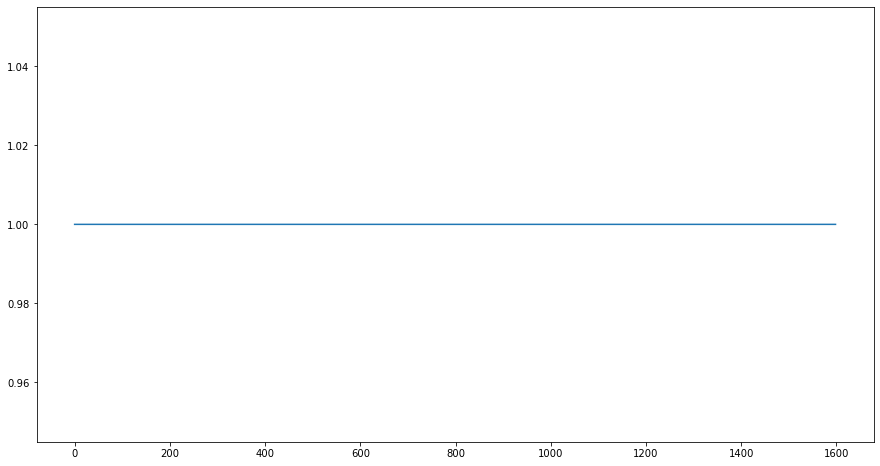

In [36]:
df.layer_flag.plot()

In [37]:
# df[['h_canopy', 'h_canopy_quad', 'h_dif_canopy']].hvplot(width=800)

In [38]:
df[['h_max_canopy', 'h_mean_canopy', 'h_median_canopy', 'h_min_canopy']].hvplot(width=800)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [39]:
df[['h_max_canopy', 'h_mean_canopy']].hvplot(width=800)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

<AxesSubplot:>

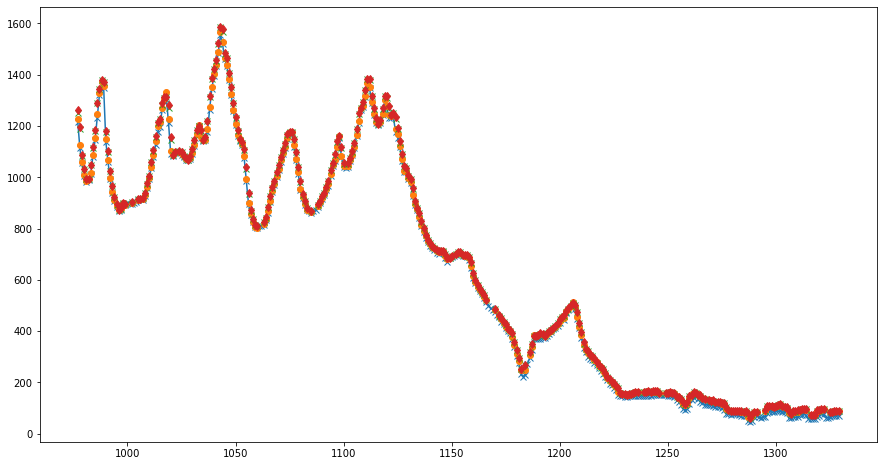

In [40]:
df = pd.read_csv(f'{icesat2_path}/{fname}.csv', parse_dates=True)
df['t_dt'] = pd.to_datetime(dfx.t_dt)
df = df[df.strip=='gt2r']

df.h_te_interp.plot(style='-x')
(df.h_canopy+df.h_te_interp).plot(style='o')
df.h_canopy_abs.plot(style='x')
df.h_max_canopy_abs.plot(style='d')

<AxesSubplot:>

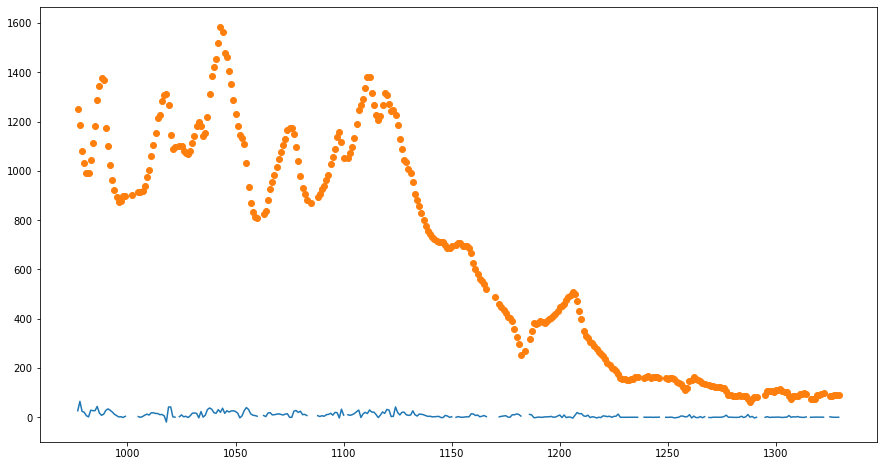

In [41]:
(df.h_canopy_abs - (df.h_canopy+df.h_te_interp)).plot()
df.h_canopy_abs.plot(style='o')

<AxesSubplot:>

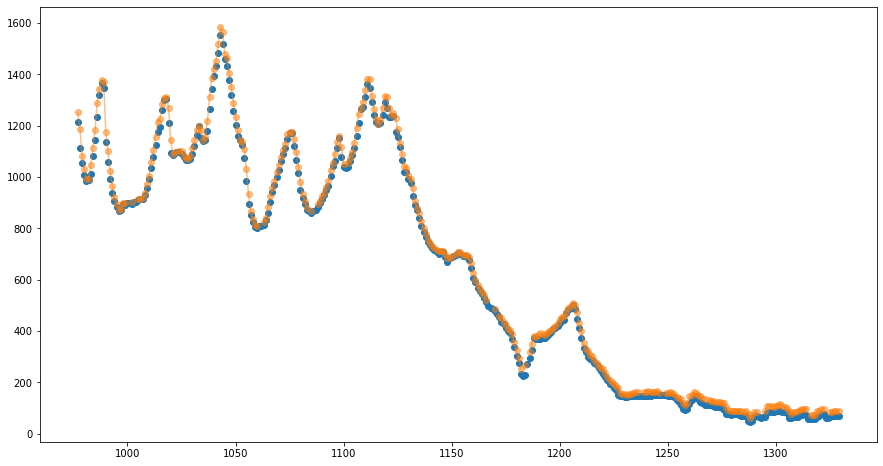

In [42]:
df.h_te_interp.plot(style='o')
df.h_canopy_abs.plot(style='-o', alpha=.5)